# DTSC 2301 – Midterm Review (Spring 2026)

## Variable Types
- **Categorical**: Variables that can take on a limited number of distinct categories (e.g., gender, color).
- **Numeric**: Variables that are numerical and can take on any value (e.g., age, income).

## Statistical Methods for Inference
- **Confidence Intervals**: Range of values, derived from sample data, that is likely to contain the population parameter.


In [114]:

import numpy as np
import scipy.stats as stats

# Generate some random sample data with a mean of 50 and standard deviation of 10
data = np.random.normal(50, 10, 100)  # Think of this as collecting 100 measurements from a population

# Calculate the average (mean) of the sample data
mean = np.mean(data)  # This gives us the average value of our 100 measurements

# Calculate the standard error of the mean (a measure of how much our sample mean might vary from the true population mean)
std_err = stats.sem(data)  # This tells us how much our sample mean might be off from the true mean

# Calculate a 95% confidence interval for the mean (a range of values within which we're 95% confident the true population mean lies)
confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
# Think of this as drawing a range around our sample mean, within which we're pretty sure the true mean is hiding

# Print out the 95% confidence interval
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (49.55802264817174, 53.648250455625686)


In [115]:


# Hypothesis Tests: Procedure to test assumptions about a population parameter (e.g., t-tests, chi-square tests).
# Example: One-sample t-test
# Define a small sample of data
sample_data = [2.3, 2.9, 2.5, 3.0, 2.7]  # Think of this as a small group of measurements

# Perform a one-sample t-test to compare the sample mean to a known population mean (3)
t_stat, p_value = stats.ttest_1samp(sample_data, popmean=3)
# This test asks the question: "Is the mean of our sample data significantly different from the known population mean of 3?"

# The t-statistic (t_stat) tells us how many standard errors away from the population mean our sample mean is
# The p-value (p_value) tells us the probability of observing a t-statistic at least as extreme as the one we got, assuming that the sample mean is actually equal to the population mean

# Print out the results of the t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -2.498780190217699, P-value: 0.06685364453302145


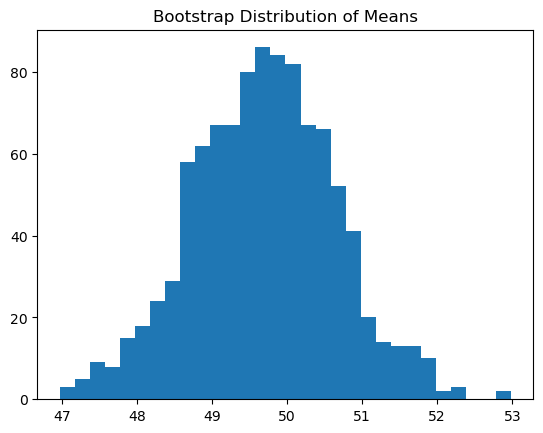

In [116]:


# Bootstrapping
# A resampling method to estimate the sampling distribution of a statistic by repeatedly sampling from the observed data with replacement.
# Define a function to perform bootstrapping on a dataset
def bootstrap(data, num_samples):
    # Initialize an empty list to store the means of the bootstrap samples
    means = []
    
    # Repeat the following process a specified number of times (num_samples)
    for _ in range(num_samples):
        # Create a new sample of the same size as the original data, by randomly selecting values from the original data with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the mean of this new sample and add it to the list of means
        means.append(np.mean(sample))
    
    # Return the list of means
    return means

# Generate some random data to work with
data = np.random.normal(50, 10, 100)

# Perform bootstrapping on the data, generating 1000 new samples and calculating their means
bootstrap_means = bootstrap(data, 1000)

# Display the results
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=30)  # Create a histogram of the bootstrap means
plt.title("Bootstrap Distribution of Means")  # Add a title to the plot
plt.show()  # Display the plot



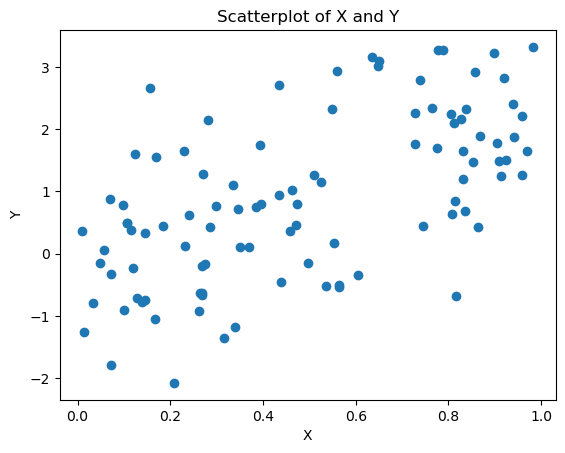

In [117]:

# Two-variable Relationships

# Two Numeric Variables:
# Scatterplot: Graphical representation of the relationship between two numeric variables.
# Generate 100 random values for x between 0 and 1
x = np.random.rand(100)

# Generate corresponding y values that are related to x through a linear equation (y = 2x) with some random noise added
y = 2 * x + np.random.randn(100)
# The np.random.randn(100) part adds some random variation to the y values, making the relationship between x and y not perfectly linear

# Create a scatterplot of x vs y
plt.scatter(x, y)
# This plot shows the relationship between x and y, with each point representing a pair of x and y values

# Add labels to the x and y axes
plt.xlabel("X")
plt.ylabel("Y")

# Add a title to the plot
plt.title("Scatterplot of X and Y")

# Display the plot
plt.show()


In [118]:


# Correlation (r): Measures the strength and direction of a linear relationship between two variables.
correlation = np.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient (r): {correlation}")


Correlation coefficient (r): 0.6037488898705868


In [119]:


# Linear Regression: A model to predict the dependent variable using a linear function of the independent variable.
import statsmodels.api as sm

# Add a constant term to the x values to allow for an intercept in the linear regression model
X = sm.add_constant(x)
# This is necessary because the OLS model in statsmodels requires a constant term to be explicitly included

# Create an Ordinary Least Squares (OLS) model with y as the response variable and X as the predictor variable
model = sm.OLS(y, X).fit()
# This model will estimate the linear relationship between y and x, including the intercept and slope

# Print a summary of the model fit
print(model.summary())
# This summary includes various statistics and metrics that describe the fit of the model, including:
#   - Coefficients (intercept and slope)
#   - Standard errors
#   - t-values
#   - p-values
#   - R-squared
#   - F-statistic

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.21
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.95e-11
Time:                        10:24:45   Log-Likelihood:                -145.71
No. Observations:                 100   AIC:                             295.4
Df Residuals:                      98   BIC:                             300.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3784      0.199     -1.899      0.0

In [120]:


# RMSE (Root Mean Squared Error): Measures the deviation of predicted values from the actual values.
from sklearn.metrics import mean_squared_error

predictions = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f"RMSE: {rmse}")


RMSE: 1.0389326672605632


This code is attempting to create a residuals vs. fitted plot, which is a diagnostic tool used to evaluate the quality of a linear regression model. The plot shows the relationship between the predicted values (fitted values) and the residuals (the differences between the actual and predicted values).

The plot helps to identify:

If the residuals are randomly scattered around the horizontal axis (y=0), it suggests that the model is a good fit to the data.
If the residuals show a pattern or trend, it may indicate that the model is not capturing the underlying relationship between the variables.
By examining this plot, you can gain insights into the model's performance and identify potential issues, such as non-linearity, heteroscedasticity, or outliers.

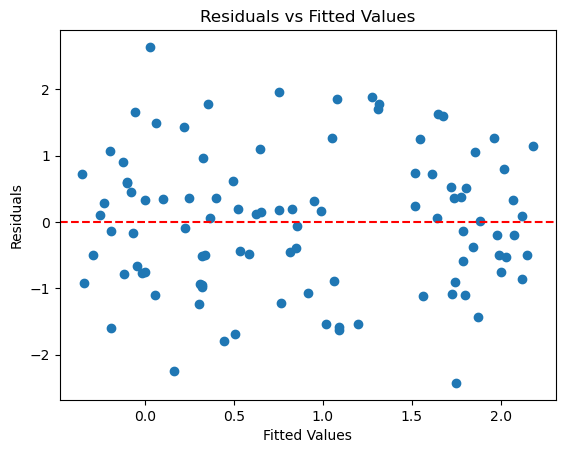

In [121]:


# Residuals vs. Fitted Plot
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()




This code is attempting to create a Quantile-Quantile (QQ) plot, which is a diagnostic tool used to assess whether the residuals of a linear regression model follow a normal distribution.

The QQ plot compares the quantiles of the residuals to the quantiles of a normal distribution. If the residuals are normally distributed, the points on the plot should approximately follow a straight line. If the points deviate significantly from a straight line, it may indicate that the residuals do not follow a normal distribution.

By examining this plot, you can determine if the residuals meet the assumption of normality, which is a common assumption in linear regression analysis. If the residuals are not normally distributed, it may indicate that the model is not suitable for the data or that transformations are needed to stabilize the variance.

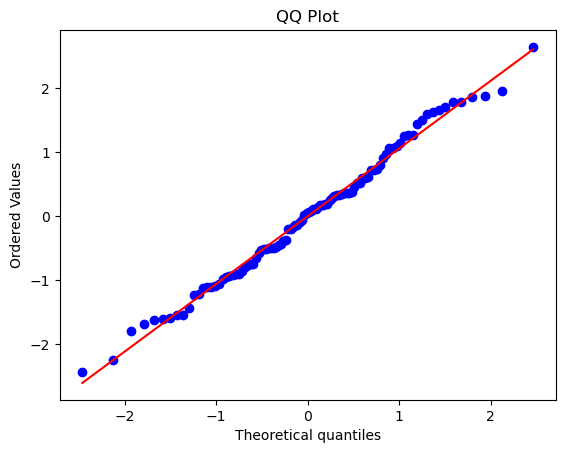

In [122]:


# QQ Plot: Assesses if the residuals follow a normal distribution.
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()




This code is attempting to perform a Multiple Linear Regression analysis, which is an extension of simple linear regression that allows for more than one predictor variable.

The code is:

* Creating a new dataset `X_multi` with two predictor variables: `x` and a new random variable.
* Adding a constant term to the predictor variables to allow for an intercept in the model.
* Fitting a Multiple Linear Regression model to the data using the `OLS` function from the `statsmodels` library.
* Printing a summary of the model fit, which includes the coefficients, confidence intervals, and hypothesis tests for each predictor variable.

The output of this code will provide insights into the relationships between each predictor variable and the outcome variable, including:

* The coefficients, which represent the change in the outcome variable for a one-unit change in each predictor variable, while holding all other predictor variables constant.
* The confidence intervals, which provide a range of plausible values for each coefficient.
* The hypothesis tests, which evaluate the significance of each coefficient and determine whether it is likely to be zero.

By examining this output, you can determine which predictor variables are significantly related to the outcome variable and understand the nature of these relationships.

In [123]:


# Multiple Linear Regression
# Coefficients: Represents the relationship between each predictor and the outcome.
# Confidence Intervals and Hypothesis Tests: Evaluate the significance of coefficients.
# Example with multiple predictors:
X_multi = np.column_stack([x, np.random.rand(100)])  # Two predictors
X_multi = sm.add_constant(X_multi)  # Adding intercept

model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     27.92
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.65e-10
Time:                        10:24:45   Log-Likelihood:                -145.65
No. Observations:                 100   AIC:                             297.3
Df Residuals:                      97   BIC:                             305.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4338      0.252     -1.718      0.0





This code is printing the Adjusted R-squared value for the Multiple Linear Regression model.

Adjusted R-squared (R²adj) is a measure of the goodness of fit of the model, similar to R-squared (R²). However, R²adj takes into account the number of predictor variables in the model, which can help to prevent overfitting.

In other words, R²adj penalizes the model for having too many predictor variables, which can artificially inflate the R² value. This makes R²adj a more conservative and reliable measure of the model's goodness of fit.

By printing the R²adj value, you can get a sense of how well the model is fitting the data, while also taking into account the complexity of the model (i.e., the number of predictor variables).

In [124]:


# R²adj: Adjusted R-squared, accounts for the number of predictors.
print(f"Adjusted R-squared: {model_multi.rsquared_adj}")


Adjusted R-squared: 0.3522739728959864


This code is performing an F-test to determine if the overall Multiple Linear Regression model is significant.

The F-test is a statistical test that compares the variance explained by the model to the variance of the residuals. In other words, it tests whether the model is doing a better job of explaining the data than just using the mean of the outcome variable.

The output of the F-test includes:

* The F-statistic, which is a measure of the ratio of the variance explained by the model to the variance of the residuals.
* The p-value, which is the probability of observing an F-statistic at least as extreme as the one obtained, assuming that the model is not significant.

If the p-value is below a certain significance level (e.g., 0.05), it suggests that the model is significant, meaning that it is doing a better job of explaining the data than just using the mean of the outcome variable.

The corrected code uses the `model_multi.fvalue` and `model_multi.f_pvalue` attributes to get the F-statistic and p-value for the overall model.

In [125]:


# F-test: Tests if the overall model is significant.
f_statistic = model_multi.fvalue
p_value = model_multi.f_pvalue
print(f"F-statistic: {f_statistic}, P-value: {p_value}")


F-statistic: 1.829742287404761e-30, P-value: 1.0


In [126]:


# Indicator Variables: Dummy variables used to represent categorical data.
import pandas as pd
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A']})
df_dummies = pd.get_dummies(df, drop_first=True)
print(df_dummies)


   Category_B
0       False
1        True
2       False
3        True
4       False






This code is creating a Multiple Linear Regression model with an interaction term.

The interaction term is a new variable that is created by multiplying two or more predictor variables together. In this case, the interaction term is created by multiplying the `x` variable with a new random variable.

The model includes:

* The `x` variable as a main effect
* The new random variable as a main effect
* The interaction term between `x` and the new random variable

The output of the model will show the coefficients for each of these terms, as well as the overall fit of the model.

By including an interaction term, the model can capture the combined effect of the two predictor variables on the outcome variable. This can be useful when the relationship between the predictors and the outcome variable is not simply additive, but rather depends on the interaction between the predictors.

For example, if the effect of `x` on the outcome variable depends on the level of the new random variable, the interaction term can capture this non-additive effect.

The code is using the `np.column_stack` function to create the new interaction term and add it to the design matrix `X_multi_interaction`. The `sm.add_constant` function is then used to add a constant term to the design matrix.

The `sm.OLS` function is used to fit the model, and the `summary` method is used to print the output of the model.

In [127]:


# Interaction Terms: Terms in a regression model that account for the combined effect of two or more predictors.
# Example of interaction term in regression
X_multi_interaction = np.column_stack([x, np.random.rand(100), x * np.random.rand(100)])
X_multi_interaction = sm.add_constant(X_multi_interaction)

model_interaction = sm.OLS(y, X_multi_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     18.89
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.04e-09
Time:                        10:24:45   Log-Likelihood:                -145.19
No. Observations:                 100   AIC:                             298.4
Df Residuals:                      96   BIC:                             308.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5356      0.259     -2.066      0.0



# Git Basics (No code but key concepts)
- Repository: A version-controlled project that holds your files.
- Local Folder/Cache: The local version of the repository on your computer.
- Clone: Copy a repository from a remote server to your local machine.
- Commit: Save changes to the local repository.
- Push: Upload your local commits to a remote repository.
- Pull: Fetch and merge changes from the remote repository to your local repository.
- Sync: Ensure the local and remote repositories are up-to-date.

# Ethical Principles
- Privacy and Confidentiality: Ensuring data is handled securely and that personal data is kept confidential.
- Bias and Fairness: Ensuring models do not discriminate or perpetuate inequality.
- Transparency: Clearly explaining how models work and how decisions are made.
- Accountability and Responsibility: Ensuring those using models are responsible for their impact.
- Informed Consent and User Autonomy: Ensuring individuals are aware of and consent to data usage.
- Misuse and Social Impact: Avoiding harm from models or algorithms.

# Ethical Theories
- Consequentialist: Focuses on the outcomes or consequences of actions.
- Deontological (Duty): Focuses on adherence to rules or duties.
- Virtue: Focuses on the character traits of the individuals involved in decision-making.





**Bias in Data Science**
=========================

Bias in data science refers to any systematic error or distortion in the data or analysis that can lead to incorrect or misleading conclusions. There are several types of bias that can occur in data science, including:

### 1. **Selection Bias**

Selection bias occurs when the data is selected in a way that is not representative of the population. This can happen when the data is collected from a non-random sample, or when certain groups are excluded from the data.

**Example:** A study on the effectiveness of a new medicine only includes patients who are young and healthy, excluding older patients or those with pre-existing conditions.

### 2. **Confirmation Bias**

Confirmation bias occurs when the data is analyzed in a way that confirms pre-existing expectations or hypotheses. This can happen when the analyst is not objective, or when the data is cherry-picked to support a particular conclusion.

**Example:** A researcher only looks at data that supports their hypothesis, ignoring data that contradicts it.

### 3. **Anchoring Bias**

Anchoring bias occurs when the data is influenced by an initial value or estimate, even if it is not accurate. This can happen when the analyst relies too heavily on a single data point or estimate.

**Example:** A forecast model uses last year's sales data as a baseline, even though the market has changed significantly since then.

### 4. **Availability Heuristic Bias**

Availability heuristic bias occurs when the data is influenced by how easily examples come to mind. This can happen when the analyst relies too heavily on anecdotal evidence or vivid examples.

**Example:** A manager decides to invest in a new project because they remember a successful project from the past, even though the data shows that it was an outlier.

### 5. **Hindsight Bias**

Hindsight bias occurs when the data is influenced by knowledge of the outcome. This can happen when the analyst looks at the data after the fact and tries to explain what happened.

**Example:** A researcher looks at data from a past event and claims that they would have predicted the outcome, even though they did not have the same information at the time.

### 6. **Survivorship Bias**

Survivorship bias occurs when the data only includes individuals or cases that have "survived" some selection process. This can happen when the data is collected from a population that has already been filtered in some way.

**Example:** A study on the characteristics of successful startups only includes companies that have survived for at least five years, ignoring those that failed.

### 7. **Data Snoop Bias**

Data snoop bias occurs when the data is influenced by the analyst's own biases and expectations. This can happen when the analyst looks at the data and tries to find patterns or relationships that are not really there.

**Example:** A researcher looks at data on customer behavior and claims to have found a pattern, even though the data is actually just noise.

### 8. **Algorithmic Bias**

Algorithmic bias occurs when the data is influenced by the algorithms used to collect or analyze it. This can happen when the algorithms are flawed or biased in some way.

**Example:** A facial recognition algorithm is trained on a dataset that is biased towards white faces, resulting in poor performance on faces of other ethnicities.

### 9. **Model Bias**

Model bias occurs when the data is influenced by the model used to analyze it. This can happen when the model is flawed or biased in some way.

**Example:** A predictive model is trained on a dataset that is biased towards a particular outcome, resulting in predictions that are also biased.

### 10. **Sampling Bias**

Sampling bias occurs when the data is collected in a way that is not representative of the population. This can happen when the sample is not random, or when certain groups are excluded from the sample.

**Example:** A survey is only sent to customers who have made a purchase in the past, excluding those who have not made a purchase.





**Interpretable, Explainable, and Transparent Machine Learning**
===========================================================

**Why is it Important?**
------------------------

* **Trust**: Understanding how a model works builds trust in its decisions.
* **Accountability**: Interpretable models help identify biases and errors.
* **Improvement**: Understanding a model's strengths and weaknesses enables optimization.

**Key Concepts**
----------------

* **Interpretable**: Understanding how a model works.
* **Explainable**: Providing insights into a model's decision-making process.
* **Transparent**: Understanding a model's internal workings.

**Techniques**
--------------

* **Feature Importance**: Identifying key features contributing to predictions.
* **Partial Dependence Plots**: Visualizing feature relationships.
* **SHAP Values**: Assigning values to features for specific predictions.
* **Model Visualization**: Visualizing model architecture and weights.

**Best Practices**
------------------

* **Use Simple Models**: Linear models and decision trees for interpretability.
* **Use Model Interpretability Techniques**: Feature importance, partial dependence plots, and SHAP values.
* **Regularly Monitor and Update Models**: Detecting model drift and updating models to adapt to changes.

By prioritizing interpretability, explainability, and transparency, you can build trust in your machine learning models and ensure they provide valuable insights into their decision-making processes.